# VO2 Max Model Experiments
##### Andrew Lefebvre and Adam Cabral

### Here we test multiple different regression methods and compare their results to find the best to use.

In [14]:
import pandas as pd
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing
from matplotlib import pyplot as plt

In [4]:
# test_df = pd.read_csv("./data/rawData/sbj_1_I.csv")
df = pd.read_csv("../data/concatedData/combined_csv.csv")
prepro = preprocessing.MinMaxScaler()

# df = pd.read_csv("./data/rawData/sbj_2_I.csv")
df.drop(['Cadence', 'time'], axis=1, inplace=True)
# test_df.drop(['Cadence', 'Time'], axis=1, inplace=True)

In [5]:
df.head()

,Power,Oxygen,HR,RF
0,0.0,742.400000,73.200000,16.800000
1,0.0,737.500000,73.500000,16.000000
2,0.0,729.261905,73.642857,15.404762
3,0.0,718.937500,73.687500,14.937500
4,0.0,707.222222,73.666667,14.555556


In [6]:
df.describe()

,Power,Oxygen,HR,RF
count,194331.000000,194331.000000,194331.000000,194331.000000
mean,142.437478,2313.769284,127.814212,29.158271
std,121.223069,1272.320962,35.887111,9.604156
min,0.000000,105.273333,45.394286,5.927273
25%,0.000000,1096.750000,101.000000,22.300000
50%,134.000000,2282.083333,129.900000,28.200000
75%,247.000000,3307.950000,157.550000,35.050000
max,899.028571,5988.450000,204.600000,172.300000


In [7]:
feat_df = df.drop(['Oxygen'], axis=1)
targ_df = df['Oxygen']

train_feat_df, test_feat_df, train_targ_df, test_targ_df = train_test_split(feat_df, targ_df, test_size = 0.20, random_state=42, shuffle=True)

train_feat_df = prepro.fit_transform(train_feat_df)
test_feat_df = prepro.transform(test_feat_df)


## Models to be tested:
##### 1. KNN Regression


In [8]:
from sklearn.neighbors import KNeighborsRegressor

KNN_Parameters = {'n_neighbors': [i for i in range(1,100)]}
neigh_regr = GridSearchCV(KNeighborsRegressor(), KNN_Parameters, verbose = 1, n_jobs = 4)
neigh_regr.fit(train_feat_df, train_targ_df)


Fitting 5 folds for each of 99 candidates, totalling 495 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   16.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  1.4min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed:  2.9min
[Parallel(n_jobs=4)]: Done 495 out of 495 | elapsed:  3.3min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=4,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                         23, 24, 25, 26, 27, 28, 29, 30, ...]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=1)

In [9]:
test_pred_targ = neigh_regr.predict(test_feat_df)
print("Predicted Max Oxygen: ", test_pred_targ.max(), "Actual Max Oxygen: ", test_targ_df.max())

Predicted Max Oxygen:  5984.55 Actual Max Oxygen:  5984.55


Text(0, 0.5, 'Accuracy')

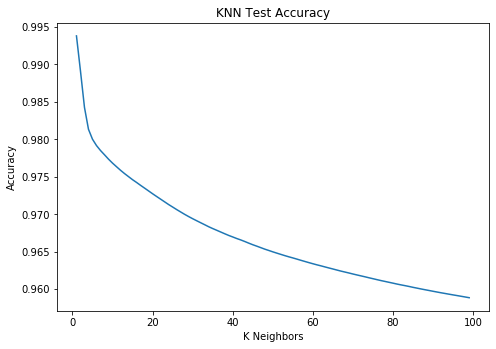

In [23]:
# neigh_regr.cv_results_['mean_test_score']
fig = plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.plot(neigh_regr.cv_results_['param_n_neighbors'].data, neigh_regr.cv_results_['mean_test_score'])
ax.set_title("KNN Test Accuracy")
ax.set_xlabel('K Neighbors')
ax.set_ylabel('Accuracy')

In [ ]:
r2_score(test_pred_targ,test_targ_df)

##### 2. Linear Regression

In [53]:
from sklearn.linear_model import LinearRegression
lin_regr = LinearRegression(n_jobs = 4)
lin_regr.fit(train_feat_df, train_targ_df)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=4, normalize=False)

In [54]:
LinearR_pred_targ = lin_regr.predict(test_feat_df)
print("Predicted Max Oxygen: ", LinearR_pred_targ.max(), "Actual Max Oxygen: ", test_targ_df.max())

Predicted Max Oxygen:  6882.422394379839 Actual Max Oxygen:  5984.55


In [55]:
r2_score(LinearR_pred_targ,test_targ_df)

0.8665731932398856

##### 3. Support Vector Machine

In [56]:
from sklearn import svm
# svm_regr = svm.SVR()
svm_parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
 
# svm_regr = GridSearchCV(svm.SVR(), svm_parameters, verbose = 3, n_jobs = 4)
svm_regr = svm.SVR(verbose = True)
svm_regr.fit(train_feat_df, train_targ_df)

[LibSVM]

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=True)

In [57]:
svm_pred = svm_regr.predict(test_feat_df)
print("Predicted Max Oxygen: ", svm_pred.max(), "Actual Max Oxygen: ", test_targ_df.max())

Predicted Max Oxygen:  4476.221685593533 Actual Max Oxygen:  5984.55


In [58]:
r2_score(svm_pred,test_targ_df)

0.885874204343129

##### 4. MLP Regressor

In [60]:
from sklearn.neural_network import MLPRegressor

In [61]:
mlp_regr = MLPRegressor(random_state=1, max_iter=30, solver='sgd', verbose=True).fit(train_feat_df, train_targ_df)

Iteration 1, loss = 1339720.27518226
Iteration 2, loss = 808961.80061636
Iteration 3, loss = 808964.29929086
Iteration 4, loss = 808965.58147298
Iteration 5, loss = 808534.21818588
Iteration 6, loss = 808958.98576278
Iteration 7, loss = 808963.90186481
Iteration 8, loss = 808954.18085950
Iteration 9, loss = 808964.80249432
Iteration 10, loss = 808952.45535072
Iteration 11, loss = 808966.45427622
Iteration 12, loss = 808968.57930625
Iteration 13, loss = 808960.09297567
Iteration 14, loss = 808959.69055934
Iteration 15, loss = 808962.01152645
Iteration 16, loss = 808961.64715882
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


In [62]:
mlp_pred = mlp_regr.predict(test_feat_df)
print("Predicted Max Oxygen: ", mlp_pred.max(), "Actual Max Oxygen: ", test_targ_df.max())

Predicted Max Oxygen:  2316.0217571591525 Actual Max Oxygen:  5984.55


In [63]:
r2_score(mlp_pred,test_targ_df)

0.0